# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [242]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [243]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [244]:
pyber_data_df['date'] = pd.to_datetime(pyber_data_df['date'])
pyber_data_df.dtypes

city                    object
date            datetime64[ns]
fare                   float64
ride_id                float64
driver_count             int64
type                    object
dtype: object

## Deliverable 1: Get a Summary DataFrame 

In [245]:
#  1. Get the total rides for each city type. 
# In Step 1, use the groupby() function to create a Series of data that has the type of city as the index, then apply the count() method to the "ride_id" column.
city_total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
city_total_rides


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [246]:
# 2. Get the total drivers for each city type. 
# In Step 2, use the groupby() function to create a Series of data that has the type of city as the index, then apply the sum() method to the "driver_count" column.
city_total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
city_total_drivers


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [247]:
#  3. Get the total amount of fares for each city type. 
# In Step 3, use the groupby() function to create a Series of data that has the type of city as the index, then apply the sum() method to the "fare" column.
fares_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
fares_city_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [248]:
#  4. Get the average fare per ride for each city type.
# In Step 4, calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.
average_fare_city = pyber_data_df.groupby(["type"]).sum()["fare"] / city_total_rides
average_fare_city


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [249]:
# 5. Get the average fare per driver for each city type.
# In Step 5, calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers.
average_fare_driver = pyber_data_df.groupby("type").sum()["fare"] / city_total_drivers
average_fare_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [250]:
#  6. Create a PyBer summary DataFrame. 
# In Step 6, create a PyBer summary DataFrame with all the data gathered from Steps 1-5, using the column names shown below:
pyber_summary_df = pd.DataFrame(
    {"Total Rides":city_total_rides,
    "Total Drivers": city_total_drivers,
    "Total Fares":fares_city_type,
    "Average Fares per Ride":average_fare_city,
    "Average Fares per Driver":average_fare_driver})

pyber_summary_df





,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fares per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [251]:
#  7. Cleaning up the DataFrame. Delete the index name
# In Step 7, use the provided code snippet to remove the index name ("type") from the PyBer summary DataFrame.
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fares per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [252]:
#  8. Format the columns.
# In Step 8, format the columns of the Pyber summary DataFrame to look like Figure.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map('{:,}'.format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map('{:,}'.format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map('${:,.2f}'.format)
pyber_summary_df["Average Fares per Ride"] = pyber_summary_df["Average Fares per Ride"].map('${:,.2f}'.format)
pyber_summary_df["Average Fares per Driver"] = pyber_summary_df["Average Fares per Driver"].map('${:,.2f}'.format)

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fares per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [253]:
# 1. Read the merged DataFrame
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12,46,Urban


In [254]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
#In Step 1, create a new DataFrame with multiple indices using the groupby() function on the "type" and "date" columns of the pyber_data_df DataFrame, 
# then apply the sum() method on the "fare" column to show the total fare amount for each date.
typedate_fare_df = pyber_data_df.groupby(["type","date"]).sum().fare.to_frame()
typedate_fare_df.head()


fare
type  date                      
Rural 2019-01-01 09:45:00  43.69
      2019-01-02 11:18:00  52.12
      2019-01-03 19:51:00  19.90
      2019-01-04 03:31:00  24.88
      2019-01-06 07:38:00  47.33

In [255]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

typedate_fare_df = typedate_fare_df.reset_index()
typedate_fare_df.head()


,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33


In [256]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
typedate_fare_df = typedate_fare_df.pivot(index="date", columns="type", values="fare")
typedate_fare_df.head()



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75


In [257]:
typedate_fare_df.dtypes

type
Rural       float64
Suburban    float64
Urban       float64
dtype: object

In [258]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
locbydate_df = typedate_fare_df.loc['2019-01-01':'2019-04-29']
locbydate_df.head()



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75


In [259]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

locbydate_df.index = pd.to_datetime(locbydate_df.index)

In [260]:
# 7. Check that the datatype for the index is datetime using df.info()
locbydate_df.index.dtype


dtype('<M8[ns]')

In [261]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

locbydate_df = locbydate_df.resample('W').sum()
locbydate_df




type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


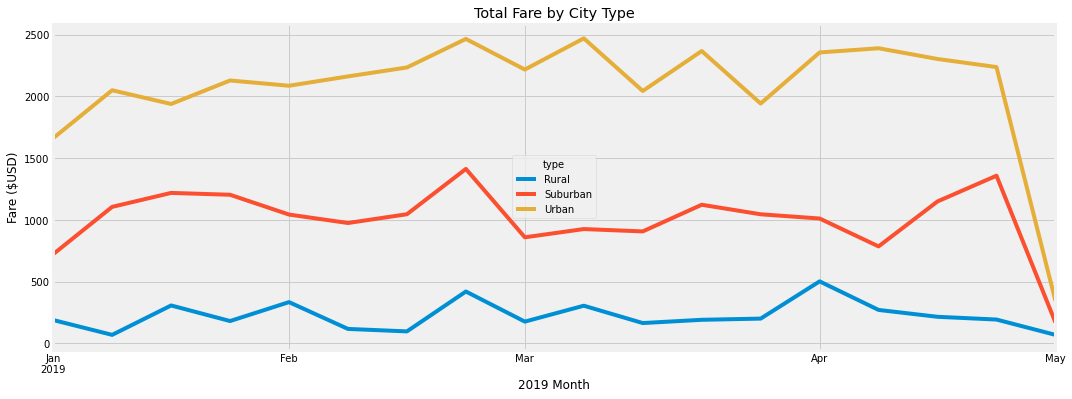

In [262]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.


ax = locbydate_df.plot(figsize=(16,6))
ax.plot()
ax.set_title('Total Fare by City Type')
ax.set_ylabel('Fare ($USD)')
ax.set_xlabel('2019 Month')

style.use('fivethirtyeight')
plt.savefig("Resources/Pyber_Challenge_Fig.png")
plt.show()


